# Can we predict business registration?

In [1]:
import pandas as pd 
import numpy as np

# Tratamentos iniciais

1) Lendo os dados 

In [2]:
df = pd.read_excel("Base_completa_tratada.xlsx")

2) Selecionando as variávies que vamos utilizar

In [3]:
df = df[['qtd_abertas_Empresario_Individual','Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos','taxa_homicidio','RH_adm_dir','ISH','densidade_banda_larga','densidade_telefonia_movel','qtd_cursos_engenharias',
    'qtd_cursos_negocios_direito','media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO','valor_medio_recebido_familia','pib_per_capita_preco_corrente','perc_20_59_anos','pop_total','total_sim_tecnologia']]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  5570 non-null   int64  
 1   Mecanismos_incentivo               5568 non-null   object 
 2   Reducao_IPTU                       3484 non-null   object 
 3   Isencao_IPTU                       3484 non-null   object 
 4   Reducao_ISSQN                      3484 non-null   object 
 5   Isencao_ISSQN                      3484 non-null   object 
 6   Isencao_Tx                         3484 non-null   object 
 7   Cessao_terrenos                    3484 non-null   object 
 8   Doacao_terrenos                    3484 non-null   object 
 9   Outros_mecanismos                  3484 non-null   object 
 10  taxa_homicidio                     3890 non-null   float64
 11  RH_adm_dir                         5547 non-null   float

3) Tratamentos iniciais 

Transformando o nome do município no índice da tabela

In [5]:
#df = df.set_index('NMMUN')
df.head()

,qtd_abertas_Empresario_Individual,Mecanismos_incentivo,Reducao_IPTU,Isencao_IPTU,Reducao_ISSQN,Isencao_ISSQN,Isencao_Tx,Cessao_terrenos,Doacao_terrenos,Outros_mecanismos,...,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,media_NU_NOTA_REDACAO,valor_medio_recebido_familia,pib_per_capita_preco_corrente,perc_20_59_anos,pop_total,total_sim_tecnologia
0,194,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,497.721951,504.034091,491.079545,543.558537,621.363636,18495,25091.18,0.587227,22516,18.0
1,1275,Sim,Sim,Sim,Não,Não,Sim,Não,Sim,Sim,...,474.773986,495.727950,484.710248,518.811149,584.534161,17615,25730.20,0.591797,111148,12.0
2,49,Sim,Não,Não,Não,Sim,Não,Não,Não,Sim,...,477.266667,486.071429,447.628571,522.883333,471.428571,18956,32226.25,0.584567,5067,8.0
3,1258,Sim,Não,Sim,Sim,Não,Sim,Sim,Sim,Não,...,489.744000,505.006061,490.991919,533.458933,611.717172,19376,29331.29,0.595584,86416,17.0
4,257,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,...,479.268750,477.045714,454.722857,480.696875,576.571429,17752,37069.25,0.598272,16088,8.0


Vamos fazer alguns tratamentos para algumas variáveis. 
- Nas variáveis sobre taxa de homicídios, cursos de engenharia ou negócios/direito, vamos transformar os "NA" em 0
- Nas variáveis de políticas municipais, adicionamos "Não" aos "NA"
- Nas variáveis do Enem, substituímos o valor pela mediana

In [6]:
df['qtd_cursos_engenharias'] = df['qtd_cursos_engenharias'].fillna(0)

df['qtd_cursos_negocios_direito'] = df['qtd_cursos_negocios_direito'].fillna(0)

df['total_sim_tecnologia'] = df['total_sim_tecnologia'].fillna(0)

df['taxa_homicidio'] = df['taxa_homicidio'].fillna(0)

In [7]:
df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']] = df[['Mecanismos_incentivo','Reducao_IPTU', 'Isencao_IPTU', 'Reducao_ISSQN','Isencao_ISSQN','Isencao_Tx','Cessao_terrenos',
    'Doacao_terrenos','Outros_mecanismos']].fillna('Não')

In [8]:
df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']] = df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].fillna(df[['media_notas_CN','media_notas_CH','media_NU_NOTA_LC','media_NU_NOTA_MT',
    'media_NU_NOTA_REDACAO']].median())


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df = df[np.isfinite(df).all(1)]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5547 entries, 0 to 5569
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   qtd_abertas_Empresario_Individual  5547 non-null   int64  
 1   taxa_homicidio                     5547 non-null   float64
 2   RH_adm_dir                         5547 non-null   float64
 3   densidade_banda_larga              5547 non-null   float64
 4   densidade_telefonia_movel          5547 non-null   float64
 5   qtd_cursos_engenharias             5547 non-null   float64
 6   qtd_cursos_negocios_direito        5547 non-null   float64
 7   media_notas_CN                     5547 non-null   float64
 8   media_notas_CH                     5547 non-null   float64
 9   media_NU_NOTA_LC                   5547 non-null   float64
 10  media_NU_NOTA_MT                   5547 non-null   float64
 11  media_NU_NOTA_REDACAO              5547 non-null   float

4) Separando variável dependente e variáveis independentes 

In [12]:
X = df.drop('qtd_abertas_Empresario_Individual', axis = 1)
y = df['qtd_abertas_Empresario_Individual']

# Rodando algoritmos

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,
                                                    random_state=42)

# vamos criar uma variável para região do município para usar no stratify. Eu tentei usar a variável SGUF, mas como 
# DF só tem um caso, ele não deixou eu aplicar

In [15]:
list(X_train.select_dtypes(include = ['float64','int64']))

['taxa_homicidio',
 'RH_adm_dir',
 'densidade_banda_larga',
 'densidade_telefonia_movel',
 'qtd_cursos_engenharias',
 'qtd_cursos_negocios_direito',
 'media_notas_CN',
 'media_notas_CH',
 'media_NU_NOTA_LC',
 'media_NU_NOTA_MT',
 'media_NU_NOTA_REDACAO',
 'valor_medio_recebido_familia',
 'pib_per_capita_preco_corrente',
 'perc_20_59_anos',
 'pop_total',
 'total_sim_tecnologia']

In [176]:
# https://stackoverflow.com/questions/48673402/how-can-i-standardize-only-numeric-variables-in-an-sklearn-pipeline
# criei esse procedimento para padronizar o valor das variáveis 

scaler = StandardScaler()

numeric_features = list(X_train.select_dtypes(include = ['float64','int64']))

X_train.loc[:,numeric_features] = scaler.fit_transform(X_train.loc[:,numeric_features])

X_train.head()

,taxa_homicidio,RH_adm_dir,densidade_banda_larga,densidade_telefonia_movel,qtd_cursos_engenharias,qtd_cursos_negocios_direito,media_notas_CN,media_notas_CH,media_NU_NOTA_LC,media_NU_NOTA_MT,...,Reducao_ISSQN_Sim,Isencao_ISSQN_Sim,Isencao_Tx_Sim,Cessao_terrenos_Sim,Doacao_terrenos_Sim,Outros_mecanismos_Sim,ISH_Baixa,ISH_Máxima,ISH_Média,ISH_Mínima
869,-0.243556,-0.309291,-0.886375,-0.322067,-0.089636,-0.079327,-1.517821,-2.027806,-2.072030,-1.815449,...,0,0,0,0,0,0,0,0,1,0
1223,-0.243556,-0.282632,-1.078951,-0.667171,-0.089636,-0.079327,0.479304,0.331024,0.844911,-0.345687,...,0,0,0,0,0,0,0,0,0,0
1414,-0.211621,-0.237213,-1.033721,-1.182348,-0.089636,-0.079327,-1.210267,-1.497413,-1.778589,-0.792296,...,0,0,1,0,0,0,0,0,1,0
3631,-0.243556,-0.261239,0.638662,0.966549,-0.089636,-0.079327,1.591120,1.265923,1.064882,-0.130288,...,0,0,0,0,0,0,0,1,0,0
410,-0.179686,-0.203972,-0.734349,-1.575174,-0.089636,-0.079327,-1.405162,-1.098686,-1.234158,-1.035150,...,0,0,0,0,0,0,0,0,0,0


### 1) Regressão linear

In [26]:
reg = LinearRegression().fit(X_train, y_train)

In [17]:
y_pred = reg.predict(X_test)

In [18]:
mae_rl = mean_absolute_error(y_true=y_test,y_pred=y_pred)

In [19]:
mape_rl = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)

In [20]:
rmse_rl = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

In [21]:
print("MAE:",mae_rl)
print("MAPE:",mape_rl)
print("RMSE:",rmse_rl)

MAE: 159.75429720054277
MAPE: 1.4037863329177507
RMSE: 678.2818828406215


### 2) Regressão RiDGE 

In [69]:
#RIDGE

from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(X_train, y_train)

test_pred = ridge_model.predict(X_test)
train_pred = ridge_model.predict(X_train)


#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 131.65696208319335
test MAE: 159.3796478202634
train MAPE: 1.1763883598842855
test MAPE: 1.175539624204199
train RMSE: 348.70337487474836
test RMSE: 678.2186244258634


### 3)Regressão LASSO

In [70]:
#LASSO

from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(X_train, y_train)

test_pred = lasso_model.predict(X_test)
train_pred = lasso_model.predict(X_train)


#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)

train MAE: 131.03778557078593
test MAE: 158.75921110397843
train MAPE: 1.1690450617745032
test MAPE: 1.167647956154301
train RMSE: 349.4026621421677
test RMSE: 677.9512040506519


### 4) Regressão ElasticNet

In [71]:
#Elasticnet

from sklearn.linear_model import ElasticNet

enr_model = ElasticNet()

enr_model.fit(X_train, y_train)

test_pred = enr_model.predict(X_test)
train_pred = enr_model.predict(X_train)

#mae
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
print("train MAE:", train_mae)
print("test MAE:", test_mae)

#mape
train_mape = np.sqrt (mean_absolute_percentage_error(y_train, train_pred))
test_mape = np.sqrt (mean_absolute_percentage_error(y_test, test_pred))
print("train MAPE:", train_mape)
print("test MAPE:", test_mape)

#rmse
train_rmse = np.sqrt (mean_squared_error (y_train, train_pred))
test_rmse = np.sqrt (mean_squared_error (y_test, test_pred))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)


train MAE: 129.04041781925542
test MAE: 156.79871395835798
train MAPE: 1.1480153618558944
test MAPE: 1.151807004669456
train RMSE: 350.24410359377094
test RMSE: 678.6231316337625


### 5) Arvore de Decisão - Regressão

In [30]:
#biblioteca - Arvore de Decisão (regressão)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


Using matplotlib backend: <object object at 0x000001AA2ABF8E90>


In [34]:
import pylab


In [36]:
%matplotlib inline

In [23]:
#separando em treino e teste

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.35, random_state= 42) # 30%

In [24]:
#max_depth = quantidade de divisões

arvore_decisao = DecisionTreeRegressor( max_depth= 3, random_state= 0) #OUTRO PARAMENTO -> min_samples_leaf
arvore_decisao.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [27]:
pred_arv_decisao = arvore_decisao.predict(X_valid)

np.sqrt (mean_squared_error (y_valid, pred_arv_decisao))

1214.6477809741898

[Text(0.5909090909090909, 0.875, 'qtd_cursos_negocios_direito <= 13966.5\nsquared_error = 23596315.279\nsamples = 3605\nvalue = 537.493'),
 Text(0.36363636363636365, 0.625, 'pop_total <= 310844.0\nsquared_error = 2730536.203\nsamples = 3603\nvalue = 437.875'),
 Text(0.18181818181818182, 0.375, 'pop_total <= 120214.0\nsquared_error = 414436.499\nsamples = 3552\nvalue = 286.947'),
 Text(0.09090909090909091, 0.125, 'squared_error = 90824.892\nsamples = 3431\nvalue = 189.162'),
 Text(0.2727272727272727, 0.125, 'squared_error = 1631399.012\nsamples = 121\nvalue = 3059.678'),
 Text(0.5454545454545454, 0.375, 'pop_total <= 1251525.5\nsquared_error = 51957864.481\nsamples = 51\nvalue = 10949.569'),
 Text(0.45454545454545453, 0.125, 'squared_error = 14423183.318\nsamples = 48\nvalue = 9482.875'),
 Text(0.6363636363636364, 0.125, 'squared_error = 67389029.556\nsamples = 3\nvalue = 34416.667'),
 Text(0.8181818181818182, 0.625, 'media_NU_NOTA_LC <= 532.019\nsquared_error = 5388807872.25\nsamples =

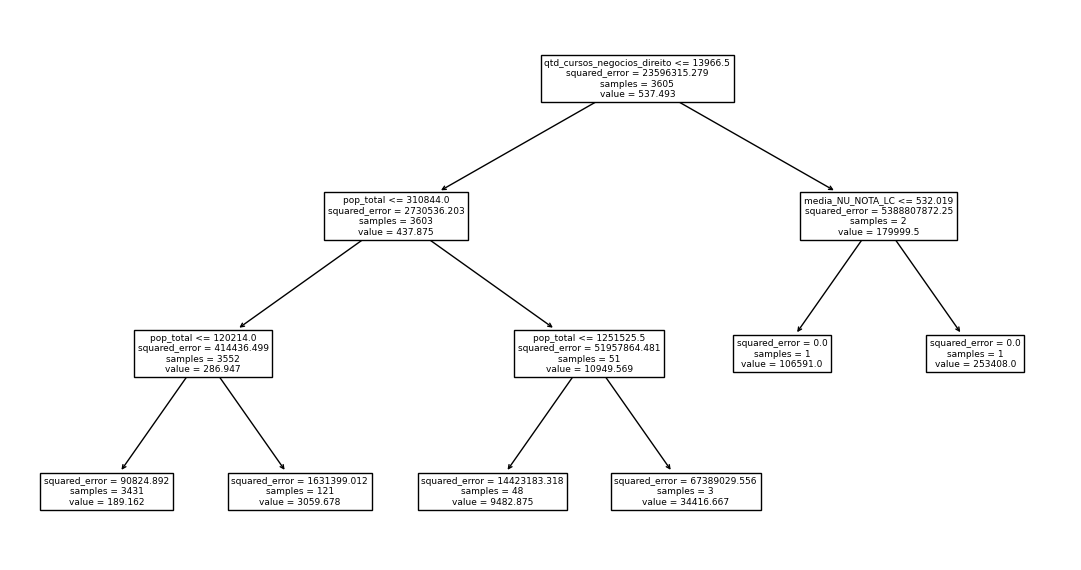

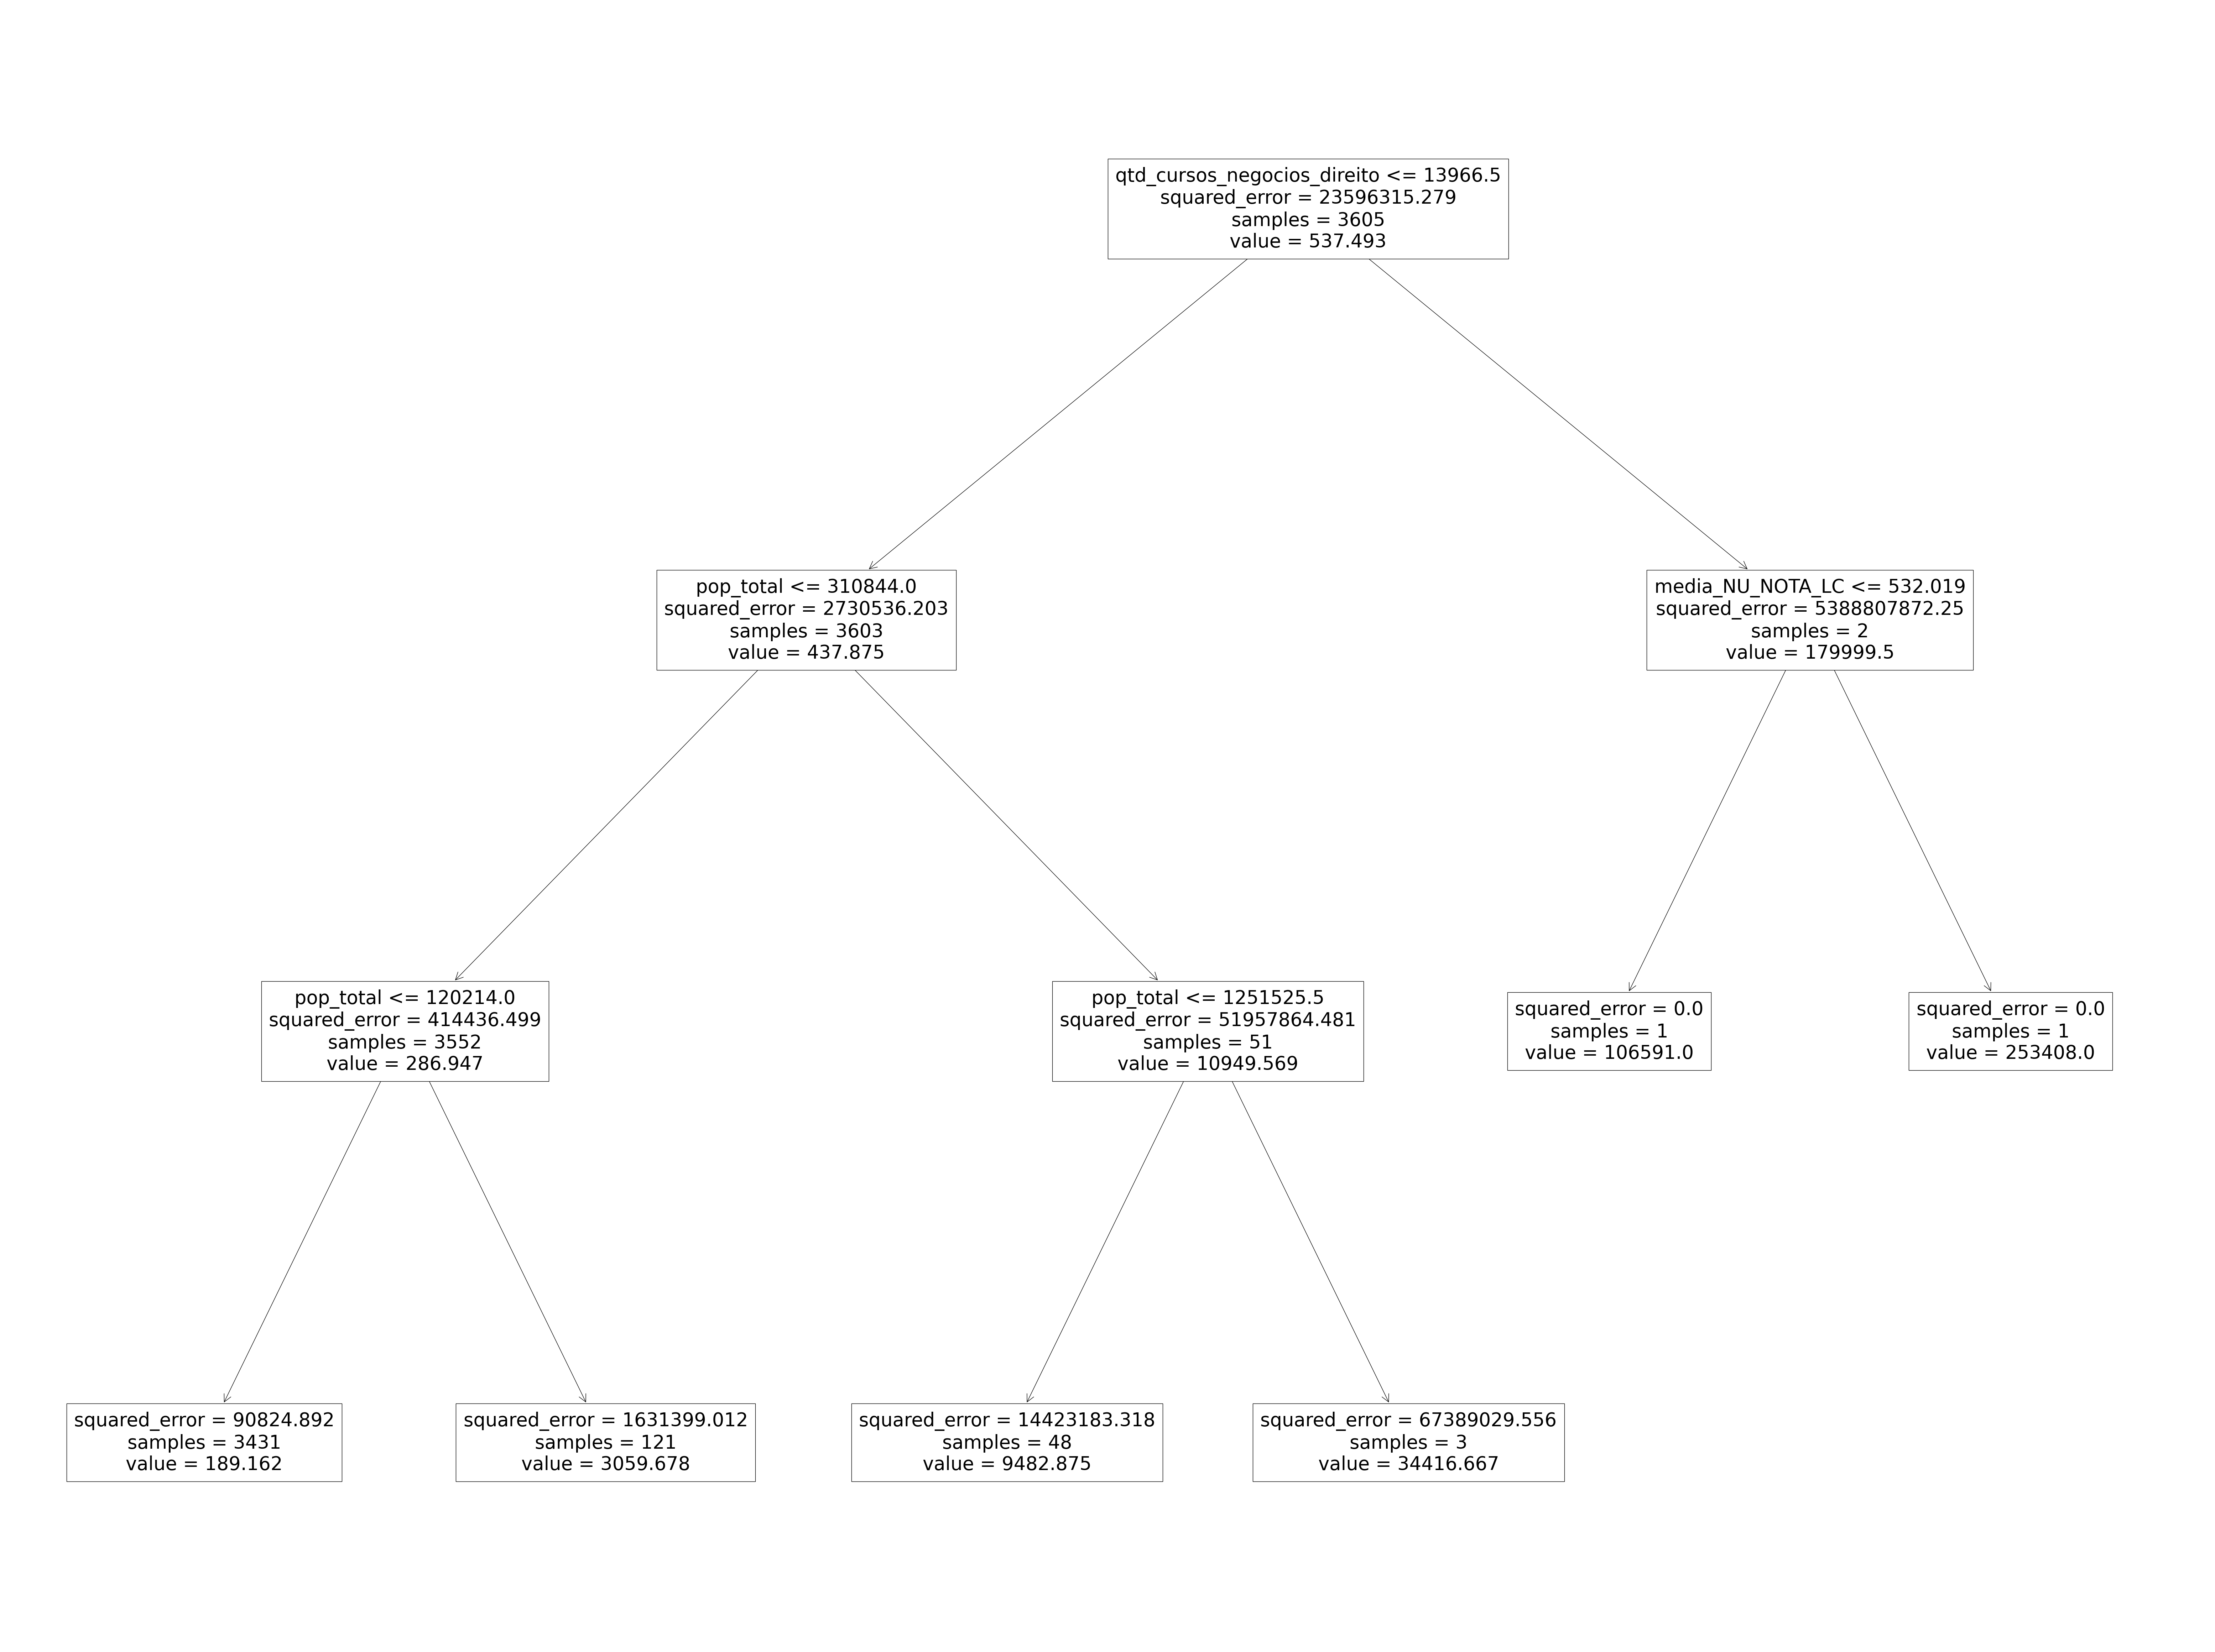

In [37]:
#pylab aumenta a vizual da figura
pylab.figure(figsize=(80,60))

#plot do infrografico
plot_tree(arvore_decisao, feature_names = X_treino.columns)